In [92]:
import mne
import numpy as np

job_arg = 8

In [111]:
raw = mne.io.read_raw_fif('./data_nn1/grasp_l_5_raw.fif')
raw.load_data()

event_ids = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
    #'leftoff': ord('q'),
    #'rightoff': ord('o')
}

event_idsOFF = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
    'leftoff': ord('q'),
    'rightoff': ord('o')
}

events = mne.find_events(raw)
#off_events = mne.event.shift_time_events(events, {'left':ord('l'), 'right':ord('r')}, 4000, 1000)
off_events = mne.pick_events(events, include=[ord('l'), ord('r')])

off_events[:,2] = np.where(off_events[:,2] == ord('l'), ord('q'), off_events[:,2])
off_events[:,2] = np.where(off_events[:,2] == ord('r'), ord('o'), off_events[:,2])

off_events[:,0] += 4300
events = np.concatenate((events, off_events))
events = events[events[:,0].argsort()]

raw.add_events(events, stim_channel='marker', replace = True)

# Save raw to .fif

raw.save('./data_nn1/grasp_l_5_off5_raw.fif', overwrite=True)

Opening raw data file ./data_nn1/grasp_l_4_raw.fif...
Isotrak not found
    Range : 0 ... 895632 =      0.000 ...   895.632 secs
Ready.
Reading 0 ... 895632  =      0.000 ...   895.632 secs...
Trigger channel has a non-zero initial value of 102 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
228 events found
Event IDs: [ 53 102 107 108 110 114]
Writing /Users/baskakovs/Documents/neurotech/CogNeuroExam/data_nn1/grasp_l_4_off5_raw.fif
Closing /Users/baskakovs/Documents/neurotech/CogNeuroExam/data_nn1/grasp_l_4_off5_raw.fif
[done]


In [44]:

# read mne-python format
raw = mne.io.read_raw_fif('./data_nn1/grasp_a_6_raw.fif')
#raw = mne.io.concatenate_raws([raw_1, raw_2])
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw.load_data()
raw.pick_types(emg=True, eeg=True, stim=True, exclude=[])

Opening raw data file ./data_nn1/grasp_a_6_raw.fif...
Isotrak not found
    Range : 0 ... 992774 =      0.000 ...   992.774 secs
Ready.
Reading 0 ... 992774  =      0.000 ...   992.774 secs...


<Raw | grasp_a_6_raw.fif, 17 x 992775 (992.8 s), ~128.8 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


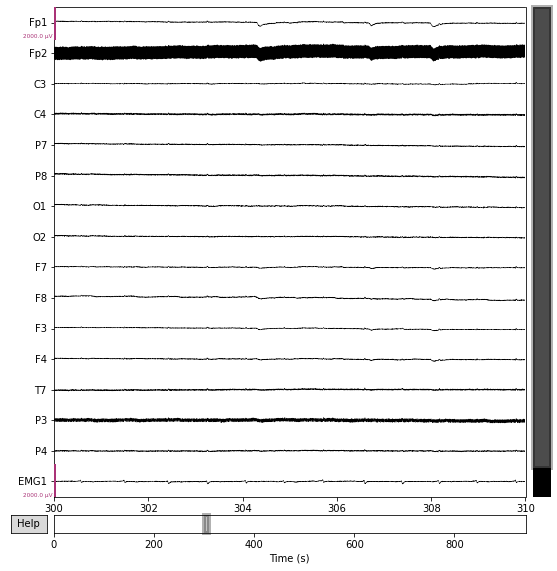

Effective window size : 2.048 (s)


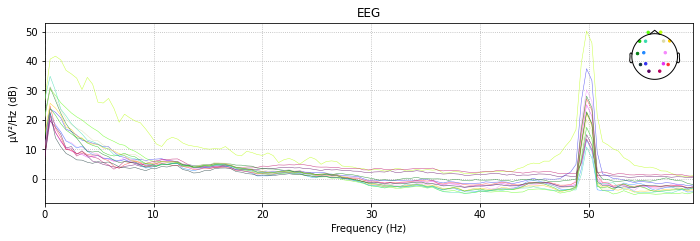

Effective window size : 2.048 (s)


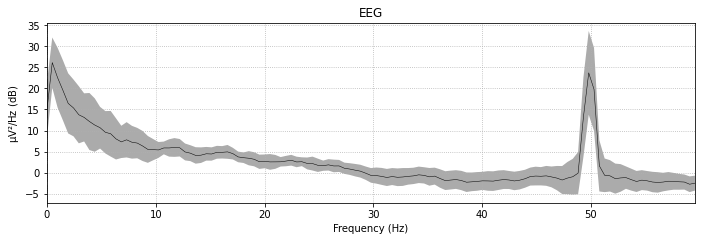

Effective window size : 2.048 (s)


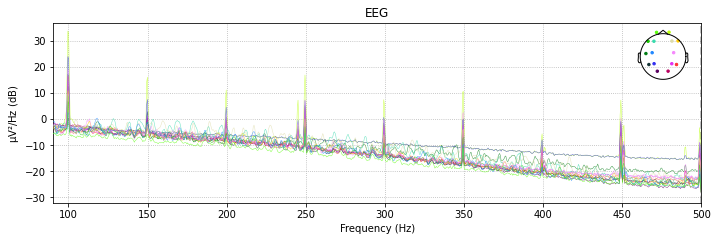

Effective window size : 2.048 (s)


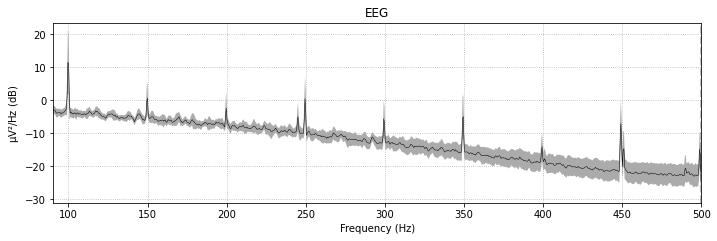

In [3]:
plt = raw.plot(n_channels = 16, start = 300, duration = 10, scalings = dict(eeg = 10e-4), theme = 'dark')
plt = raw.plot_psd(fmax=60.)
plt = raw.plot_psd(fmax=60., average=True)
plt = raw.plot_psd(fmin=90., fmax=500.0)
plt = raw.plot_psd(fmin=90., fmax=500., average=True)

In [45]:
freqs = np.arange(50., 451., 50.)
#notch_widths = freqs/200.
#notch_widths[0] = 10.

#print(notch_widths)
raw_avg_ref = raw.copy().set_eeg_reference(ref_channels='average')
raw_notch = raw_avg_ref.copy().notch_filter(freqs, picks = ['eeg'],  n_jobs=job_arg)
# spectrum fit doesn't support cuda
#raw_notch = raw.copy().notch_filter(freqs, method='spectrum_fit', picks = ['eeg'], n_jobs=8, filter_length='8s')
# raw_notch.plot_psd()
# raw_notch.plot_psd(average=True)
# raw_notch.plot_psd(fmin=30., fmax=60., average=True)
event_ids = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
    #'leftoff': ord('q'),
    #'rightoff': ord('o')
}

event_idsOFF = {
    'left': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
    'leftoff': ord('q'),
    'rightoff': ord('o')
}


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    4.4s remaining:    1.1s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    4.5s finished


In [79]:
events = mne.find_events(raw_notch)
#off_events = mne.event.shift_time_events(events, {'left':ord('l'), 'right':ord('r')}, 4000, 1000)
off_events = mne.pick_events(events, include=[ord('l'), ord('r')])

off_events[:,2] = np.where(off_events[:,2] == ord('l'), ord('q'), off_events[:,2])
off_events[:,2] = np.where(off_events[:,2] == ord('r'), ord('o'), off_events[:,2])

off_events[:,0] += 4000
events = np.concatenate((events, off_events))
events = events[events[:,0].argsort()]

raw.add_events(events, stim_channel='marker', replace = True)

# Save raw to .fif

raw.save('./data_nn1/TEST_raw.fif', overwrite=True)


252 events found
Event IDs: [ 53 102 107 108 110 114]
Writing /Users/baskakovs/Documents/neurotech/CogNeuroExam/data_nn1/TEST_raw.fif
Closing /Users/baskakovs/Documents/neurotech/CogNeuroExam/data_nn1/TEST_raw.fif
[done]


In [72]:
print(events)

[[     1      0    107]
 [  1454      0    114]
 [  5454      0    111]
 [  7792      0    102]
 [ 10131      0    107]
 [ 13447      0    110]
 [ 19785      0    102]
 [ 22124      0    107]
 [ 25440      0    110]
 [ 31777      0    102]
 [ 34117      0    107]
 [ 37333      0    108]
 [ 41333      0    113]
 [ 43670      0    102]
 [ 45963      0    107]
 [ 49278      0    110]
 [ 55565      0    102]
 [ 57858      0    107]
 [ 61171      0    110]
 [ 67461      0    102]
 [ 69750      0    107]
 [ 73016      0    108]
 [ 77016      0    113]
 [ 79307      0    102]
 [ 81596      0    107]
 [ 84862      0    114]
 [ 88862      0    111]
 [ 91199      0    102]
 [ 93442      0    107]
 [ 96708      0    108]
 [100708      0    113]
 [102999      0    102]
 [105288      0    107]
 [108603      0    110]
 [114745      0    102]
 [117039      0    107]
 [120304      0    108]
 [124304      0    113]
 [126591      0    102]
 [128884      0    107]
 [132149      0    114]
 [136149      0 

Opening raw-browser...


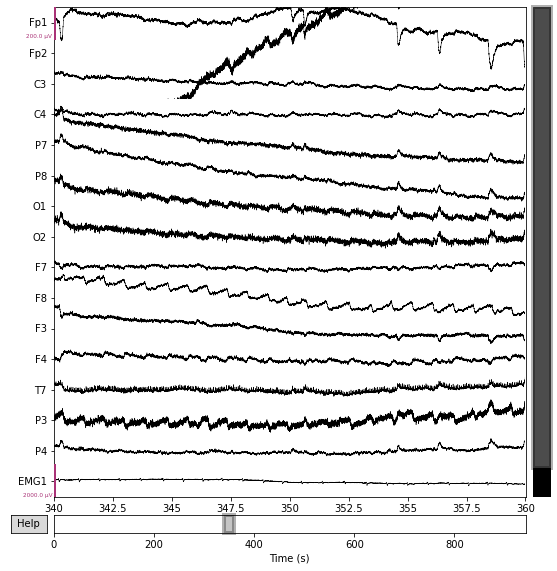

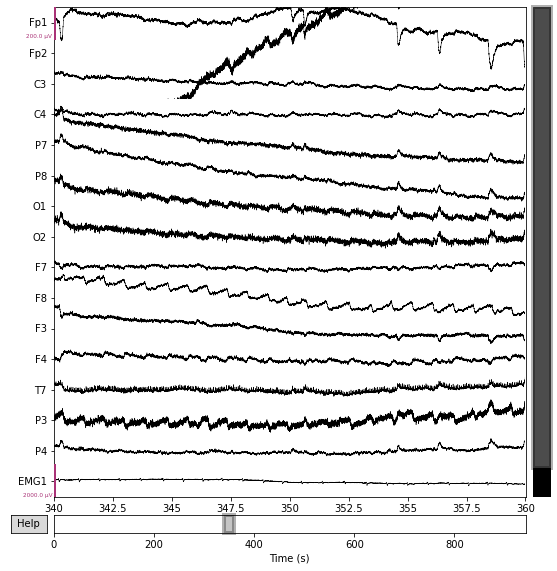

In [5]:
raw_notch.plot(n_channels = 16, start = 340, duration = 20, scalings = dict(eeg = 10e-5), theme = 'dark')

In [73]:
decim = 4
scalings = dict(eeg = 10e-5, emg = 5e-5)

raw_notch.filter(l_freq=0.1, h_freq=49., n_jobs=job_arg)

#events = mne.find_events(raw_notch)
reject = dict(eeg=150e-6)
epochs = mne.Epochs(raw_notch, events, event_id=event_idsOFF, reject=reject, preload=True, tmin=-1, tmax = 3, picks = ['C3', 'C4'])
#epochs.filter(l_freq=12, h_freq=20., n_jobs=job_arg)
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds = epochs.resample(sfreq=125., n_jobs=job_arg)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    5.9s remaining:    1.5s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    6.0s finished


Not setting metadata
305 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 305 events and 4001 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
   

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 286 out of 286 | elapsed:    0.2s finished


In [29]:
raw_notch = raw_avg_ref.copy().notch_filter(freqs, picks = ['eeg'],  n_jobs=job_arg)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    4.3s remaining:    1.1s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    4.4s finished


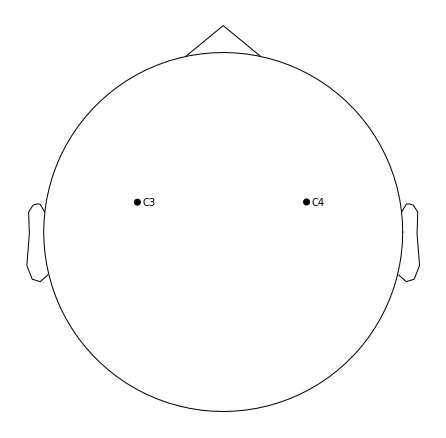

Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


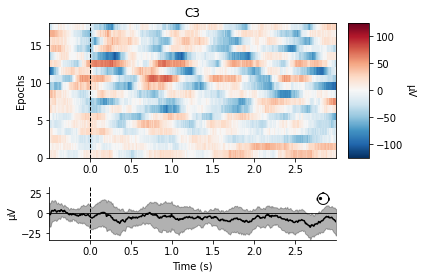

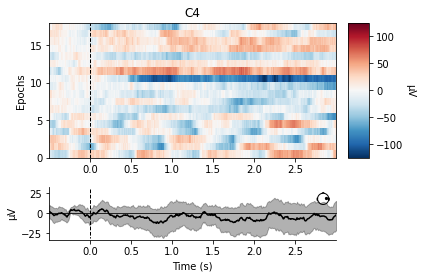

Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


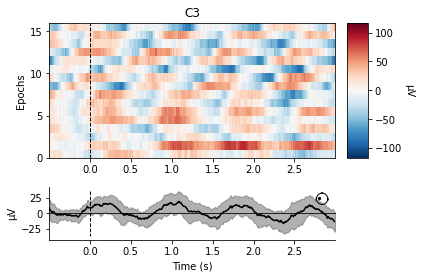

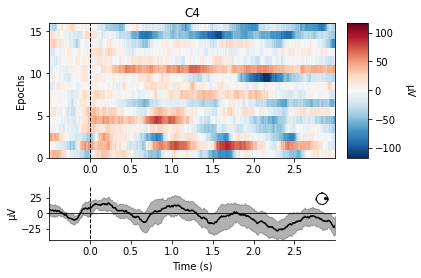

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


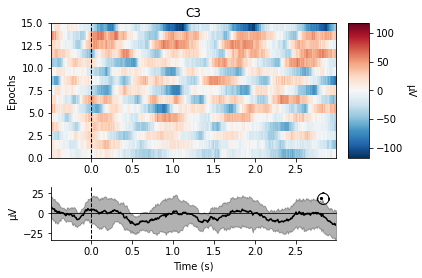

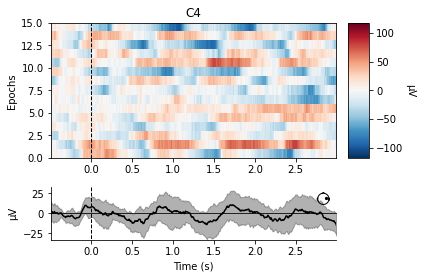

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [41]:
left_epochs = epochs_ds['left']
right_epochs = epochs_ds['right']
neutral_epochs = epochs_ds['neutral']

left_epochs.plot_sensors(show_names=True)

left_epochs.plot_image(picks=['C3', 'C4'])
right_epochs.plot_image(picks=['C3', 'C4'])
neutral_epochs.plot_image(picks=['C3', 'C4'])

# write a function that plots clench activation for C3 sensor in 18 Hz to 26 Hz frequency range

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


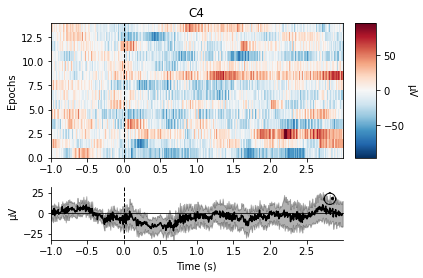

Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


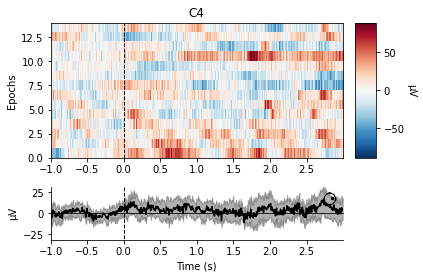

Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


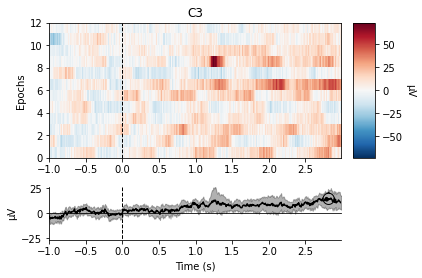

Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


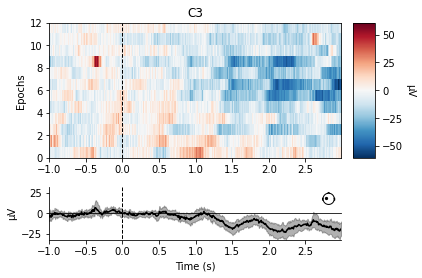

/var/folders/rm/_7rkq2vn3718t6vzkzstldjw0000gn/T/ipykernel_4297/325198854.py:11: RuntimeWarning: event 53 missing from event_id will be ignored
  mne.viz.plot_events(events, sfreq=1000, first_samp=raw_notch.first_samp, event_id=event_idsOFF)


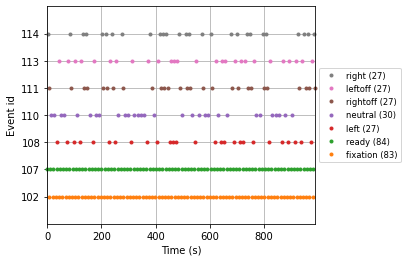

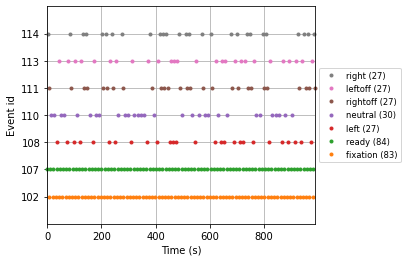

In [75]:
left_epochs = epochs_ds['left']
right_epochs = epochs_ds['right']
loff_epochs = epochs_ds['leftoff']
roff_epochs = epochs_ds['rightoff']

left_epochs.plot_image(picks=['C4'])
loff_epochs.plot_image(picks=['C4'])
right_epochs.plot_image(picks=['C3'])
roff_epochs.plot_image(picks=['C3'])

mne.viz.plot_events(events, sfreq=1000, first_samp=raw_notch.first_samp, event_id=event_idsOFF)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


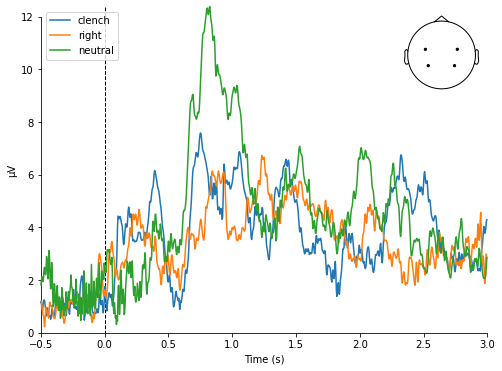

[<Figure size 576x432 with 2 Axes>]

In [10]:
clench_evoked = clench_epochs.average()
right_evoked = right_epochs.average()
neutral_evoked = neutral_epochs.average()

mne.viz.plot_compare_evokeds(dict(clench=clench_evoked, right=right_evoked, neutral=neutral_evoked), legend='upper left', show_sensors='upper right')

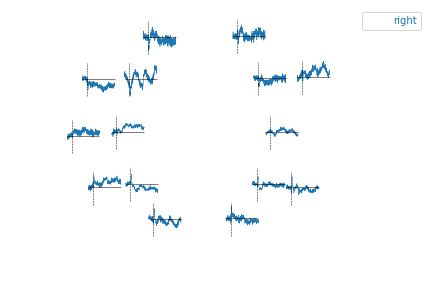

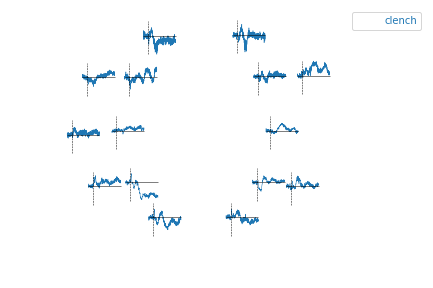

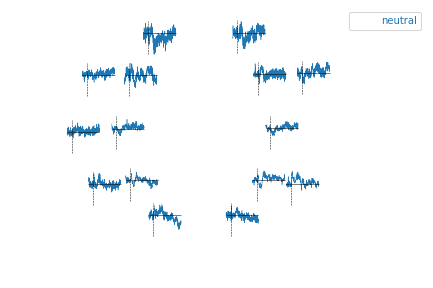

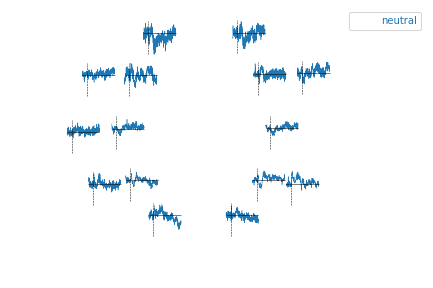

In [87]:
mne.viz.plot_evoked_topo(right_evoked)
mne.viz.plot_evoked_topo(clench_evoked)
mne.viz.plot_evoked_topo(neutral_evoked)

Ok we'll do some frequency analysis to see if we can see a signal in a particular frequency.

    Using multitaper spectrum estimation with 7 DPSS windows


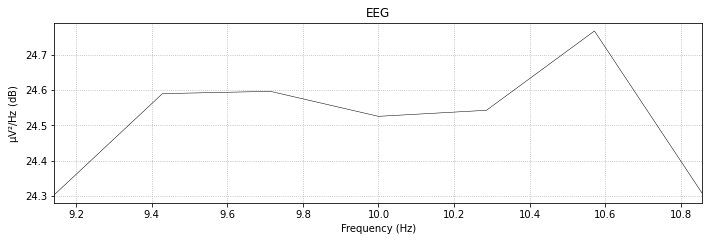

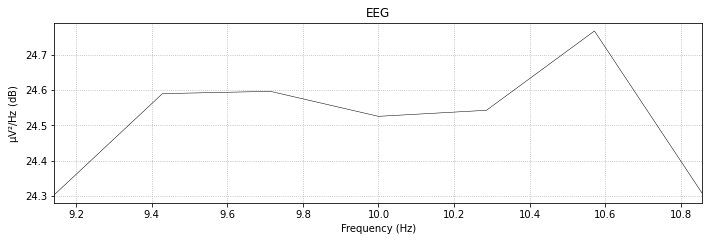

In [88]:
right_epochs.plot_psd(fmin=9, fmax=11., average=True, spatial_colors=False, picks=['C3'])